In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import joblib

In [35]:
df = pd.read_csv('../sample/sample.csv')
df.head()

,protocol,pkt_len,pkt_rate,pkt_count,ip_ttl,label
0,ICMP,60,1111.5,48,64,DDOS-Attack
1,ICMP,60,24852.0,47,64,DDOS-Attack
2,ICMP,60,19083.9,20,128,DDOS-Attack
3,TCP,1191,473.6,8,128,Normal
4,ICMP,60,14501.8,48,128,DDOS-Attack


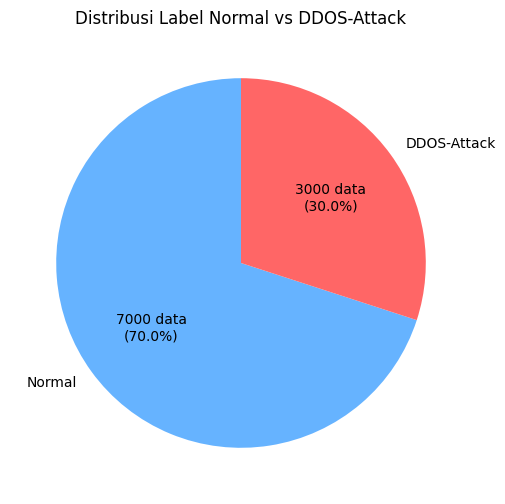

In [36]:
label_counts = df['label'].value_counts()
labels = label_counts.index
sizes = label_counts.values

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct*total/100.0))
        return f"{count} data\n({pct:.1f}%)"
    return my_autopct

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct=make_autopct(sizes), startangle=90, colors=['#66b3ff','#ff6666'])
plt.title('Distribusi Label Normal vs DDOS-Attack')
plt.show()

In [37]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
df = pd.get_dummies(df, columns=['protocol'])

df['label']

0       0
1       0
2       0
3       1
4       0
       ..
9995    0
9996    1
9997    0
9998    1
9999    0
Name: label, Length: 10000, dtype: int64

In [38]:
X = df.drop('label', axis=1)
y = df['label']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [40]:
model = GaussianNB()
model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [41]:
y_pred = model.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.4f} ({accuracy*100:.1f}%)")
print(f"Precison : {precision:.4f} ({precision*100:.1f}%)")
print(f"Recall   : {recall:.4f} ({recall*100:.1f}%)")
print(f"F1-Score : {f1:.4f} ({f1*100:.1f}%)")

Accuracy : 1.0000 (100.0%)
Precison : 1.0000 (100.0%)
Recall   : 1.0000 (100.0%)
F1-Score : 1.0000 (100.0%)


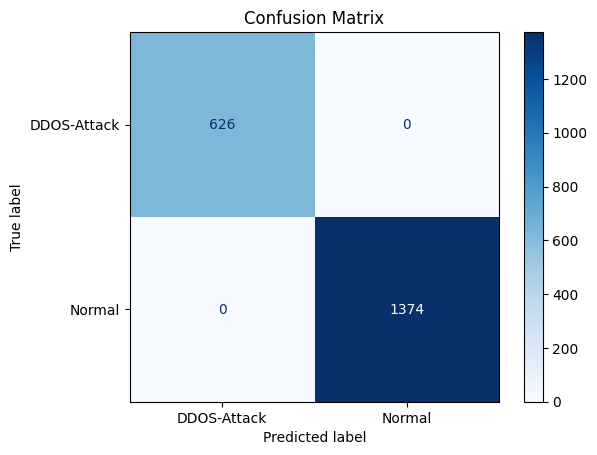

In [43]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [44]:
# joblib.dump(model, 'ddos_model.pkl')
# joblib.dump(label_encoder, 'label_encoder.pkl')

# print("\nModel dan preprocessor disimpan!")